In [1]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [7]:
df = pd.read_csv("amazon_Reviews_Cleaned.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,unixReviewTime,reviewText_punctuation,reviewText_stopwords,reviewText_tokenized,reviewText_lemmatized
0,0,0,B000F83SZQ,"[0, 0]",5,i enjoy vintage books and movies so i enjoyed ...,2014-05-05,A1F6404F1VG29J,Avidreader,1399248000,i enjoy vintage books and movies so i enjoyed ...,enjoy vintage books movies enjoyed reading boo...,"['enjoy', 'vintage', 'books', 'movies', 'enjoy...","['enjoy', 'vintage', 'book', 'movie', 'enjoyed..."
1,1,1,B000F83SZQ,"[2, 2]",4,this book is a reissue of an old one; the auth...,2014-01-06,AN0N05A9LIJEQ,critters,1388966400,this book is a reissue of an old one the autho...,book reissue old one author born 1910 era say ...,"['book', 'reissue', 'old', 'one', 'author', 'b...","['book', 'reissue', 'old', 'one', 'author', 'b..."
2,2,2,B000F83SZQ,"[2, 2]",4,this was a fairly interesting read. it had old...,2014-04-04,A795DMNCJILA6,dot,1396569600,this was a fairly interesting read it had old ...,fairly interesting read old style terminologyi...,"['fairly', 'interesting', 'read', 'old', 'styl...","['fairly', 'interesting', 'read', 'old', 'styl..."
3,3,3,B000F83SZQ,"[1, 1]",5,i'd never read any of the amy brewster mysteri...,2014-02-19,A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",1392768000,id never read any of the amy brewster mysterie...,id never read amy brewster mysteries one reall...,"['id', 'never', 'read', 'amy', 'brewster', 'my...","['id', 'never', 'read', 'amy', 'brewster', 'my..."
4,4,4,B000F83SZQ,"[0, 1]",4,"if you like period pieces - clothing, lingo, y...",2014-03-19,A3SPTOKDG7WBLN,Father Dowling Fan,1395187200,if you like period pieces clothing lingo you ...,like period pieces clothing lingo enjoy myster...,"['like', 'period', 'pieces', 'clothing', 'ling...","['like', 'period', 'piece', 'clothing', 'lingo..."


In [8]:
#Negative 1,2,3 ratings. Positive 4 and 5 ratings
df['sentiments'] = df.overall.apply(lambda x: 0 if x in [1, 2, 3] else 1)

In [9]:
#sample
np.random.seed(34)
dfsample = df.sample(frac = 0.25)


In [10]:
#Separating input feature and label
X = dfsample['reviewText_lemmatized']
y = dfsample['sentiments']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =26105111)

In [12]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectorizer.fit(X_train)
print('No. of feature_words: ', len(vectorizer.get_feature_names()))

/Users/akhilac/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


No. of feature_words:  500000


In [13]:
X_train = vectorizer.transform(X_train)
X_test  = vectorizer.transform(X_test)

In [14]:
#Function For Model Evaluation (Accuracy Score, Confusion Matrix with Plot, ROC-AUC Curve)
def model_Evaluate(model):
# Predict values for Test dataset
    y_pred = model.predict(X_test)
# Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
# Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

              precision    recall  f1-score   support

           0       0.62      0.55      0.59      1924
           1       0.92      0.94      0.93     10359

    accuracy                           0.88     12283
   macro avg       0.77      0.75      0.76     12283
weighted avg       0.87      0.88      0.87     12283



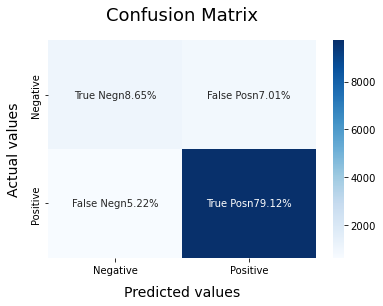

In [15]:
#Bernoulli
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

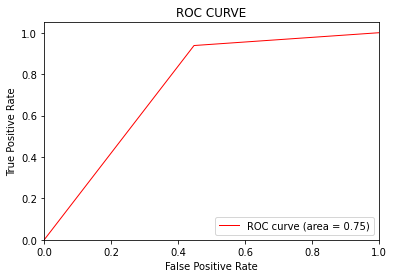

In [16]:
#Plot the ROC-AUC Curve for Bernoulli Naive Bayes Model
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='red', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.83      0.60      0.70      1924
           1       0.93      0.98      0.95     10359

    accuracy                           0.92     12283
   macro avg       0.88      0.79      0.83     12283
weighted avg       0.91      0.92      0.91     12283



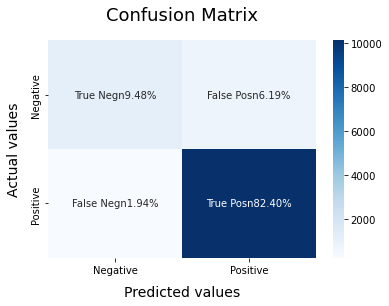

In [17]:
#Logistic Regression
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

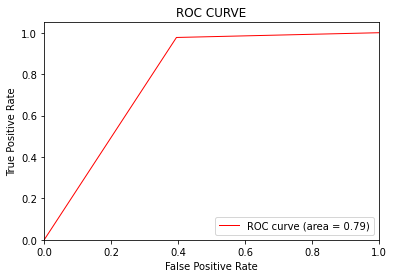

In [18]:
#Plot the ROC-AUC Curve for Logistic Regression Model
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='red', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()